## Plot natural abundances of reference metabolites in various biological samples

Here the data from three sources is used:

1) Mean concentrations in the serum of healthy adults from

Psychogios N, Hau DD, Peng J, Guo AC, Mandal R, Bouatra S, Sinelnikov I, Krishnamurthy R, Eisner R, Gautam B, Young N, Xia J, Knox C, Dong E, Huang P, Hollander Z, Pedersen TL, Smith SR, Bamforth F, Greiner R, McManus B, Newman JW, Goodfriend T, Wishart DS. The human serum metabolome. PLoS One. 2011 Feb 16;6(2):e16957

2) Concentrations measured in cells (murine cell line, E.coli and yeast) from

Park JO, Rubin SA, Xu YF, Amador-Noguez D, Fan J, Shlomi T, Rabinowitz JD. Metabolite concentrations, fluxes and free energies imply efficient enzyme usage. Nat Chem Biol. 2016 Jul;12(7):482-9. doi: 10.1038/nchembio.2077 

3) Concentrations measured in whole cells and isolated mitochondria from HeLa cell line

Chen WW, Freinkman E, Wang T, Birsoy K, Sabatini DM. Absolute Quantification of Matrix Metabolites Reveals the Dynamics of Mitochondrial Metabolism. Cell. 2016 Aug 25;166(5):1324-1337.e11.


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif',
             'sans-serif':['Arial'],
             'size':12})
rc('pdf', fonttype=42)
rc('ps', fonttype=42)

In [2]:
p = Path.cwd()
p_chem_class = p.parents[1] / r"matrix_comparison/5_data/custom_classification/custom_classification_v2.csv" #classification
p_serum = p / 'concentrations_from_serum' /'revision_mean_concentrations_in_blood.csv'
p_cells = p / 'concentrations_from_cells' / 'revision_concentrations_in_cells.csv'
p_mito = p / 'concentrations_from_mitochondria' / 'revision_concentrations_in_mitochondria.csv'

In [3]:
serum = pd.read_csv(p_serum)
cells = pd.read_csv(p_cells)
mito = pd.read_csv(p_mito)

In [4]:
# Prepare data for plotting
merged_df = serum.merge(
    cells, on=['name_short', 'hmdb_primary'], how='outer').merge(
    mito, on=['name_short', 'hmdb_primary'], how='outer')

# Melt the dataframe to create a long-format data for easier plotting
melted_df = merged_df.melt(id_vars=['name_short', 'hmdb_primary'], 
                           value_vars=['Human serum', 'Human cell line (HeLa)', 'Mitochondria (HeLa)', 'Murine cell line (iBMK)', 'E.coli', 'S.cerevisiae'],
                           var_name='Condition', value_name='Concentration / uM')

melted_df.rename(columns={'Condition': 'Sample'}, inplace=True)

# Drop rows with missing concentration values
melted_df = melted_df.dropna(subset=['Concentration / uM'])
melted_df.to_csv(p / 'abundance_plot_data.csv', index=False)

In [5]:
# Conmbine data with chemical classes for a reference
chem_subclass = pd.read_csv(p_chem_class, index_col='internal_id')[['name_short', 'coarse_class', 'fine_class']]
class_data = melted_df.merge(chem_subclass, on='name_short', how='left')
class_data.to_csv(p / 'abundance_plot_data_with_classes.csv', index=False)

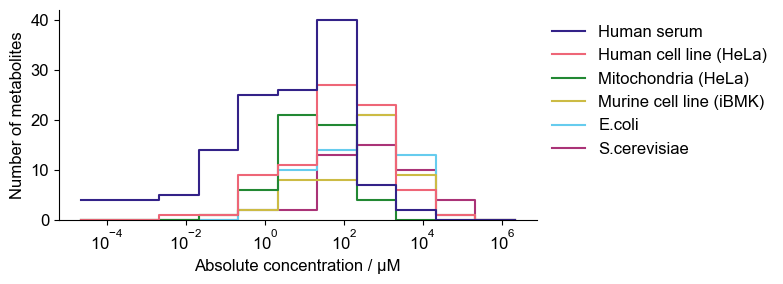

In [6]:
plt.figure(figsize=(8, 3))
ax = sns.histplot(data=melted_df, 
             x='Concentration / uM', 
             hue='Sample', 
             palette=['#332288', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377'], #Paul Tol for colorblindness
             bins=100,
             element='step', 
                  discrete=True,
             fill=False,
             log_scale=True) # log10 concentration / M is shown

# Edit plot area
sns.despine()
ax.set(ylabel='Number of metabolites', xlabel='Absolute concentration / µM')
ax.tick_params(bottom=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title='')

plt.tight_layout()

In [11]:
ax.figure.savefig(p / f"abundance_plot_revision.png")
ax.figure.savefig(p / f"abundance_plot_revision.pdf", transparent=True)